In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math

data_path="C:\\Users\\BorA\\Downloads\\"
train_data=np.loadtxt(data_path +"mnist_train.csv", delimiter=",")
test_data=np.loadtxt(data_path +"mnist_test.csv", delimiter=",")

image_size=28
no_of_different_labels=10
image_pixels=image_size*image_size

test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [11]:
train_data.ndim,train_data.shape

(2, (60000, 785))

In [12]:
train_data[10,50]

0.0

In [13]:
train_data[10,0]

3.0

In [14]:
im=train_data[10,:]
im.shape

(785,)

In [10]:
im2=im[1:]
im2.shape

(784,)

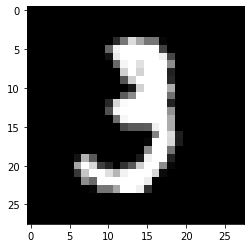

In [12]:
im3=im2.reshape(28,28)
plt.imshow(im3,cmap='gray')
plt.show()

In [15]:
m,n=train_data.shape
m,n

def count(k):
    
    s=0
    
    for i in range(m):
        if(train_data[i,0]==k):
            s=s+1      
    return s

for i in range(10):
    b=count(i)
    print(i," ",b)

0   5923
1   6742
2   5958
3   6131
4   5842
5   5421
6   5918
7   6265
8   5851
9   5949


In [3]:

def pdf(x,mu=0.0,sigma=1.0):
    eps=np.finfo(float).eps
    x=float(x-mu)/(sigma+eps)
    return math.exp(-x*x/2.0)/math.sqrt(2.0*math.pi)/(sigma+eps)

def mean_and_std(k=0,l=0,m=10000):
    
    s,t=0,0
    
    for i in range(m):
        if(train_data[i,0]==k):
            s=s+1
            t=t+train_data[i,l+1]
    mean=t/s
    
    s,t=0,0
    
    for i in range(m):
        if(train_data[i,0]==k):
            s=s+1
            diff=train_data[i,l+1]-mean
            t=t+diff*diff
    std=np.sqrt(t/(s-1))
    return mean,std



In [15]:
test_data.shape

(10000, 785)

In [16]:
mean_and_std(1,100)

(1.2972493345164153, 14.870650743271637)

In [17]:
pdf(45,4.0,2.0)

1.1059921901052853e-92

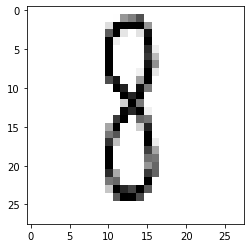

In [27]:
test_im=plt.imread('C:\\Users\\BorA\\Downloads\\Resimler\\test.jpg')
plt.imshow(test_im,cmap='gray')
plt.show()


In [28]:
test_im.shape
im2=test_im[:,:,0]
im2.shape

(28, 28)

In [29]:
im3=im2.reshape(1,784)
im3.shape


(1, 784)

In [48]:
list=[]
for i in range(10):
    pdf_t=0
    for j in range(784):
        x=im3[0,j]
        mean1,std1=mean_and_std(i,j)
        pdf_deger=pdf(x,mean1,std1)
        pdf_t=pdf_t+pdf_deger
    list.append(pdf_t)
print(list)
        
   

[7186705221432913.0, 7186705221432913.0, 0.6023272739074104, 5390028916074685.0, 7186705221432913.0, 7186705221432913.0, 0.6243617746042948, 1.078005783214937e+16, 7186705221432913.0, 8983381526791141.0]
